### 1.07 Evaluating our Model

***Three ways to evaluate scikit-learn models/ estimators:***
1. Estimator `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

>Note: See [here](https://scikit-learn.org/stable/modules/model_evaluation.html) for more info.

In [57]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

___
#### 1. Estimator `score()` method

The score function on every machine learning model, has a default evaluation metric:
* Regression models return the coefficient of determination R^2 of the prediction
* Classification models return the mean accuracy on the given test data and labels

In [58]:
# Import heart disease data
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier().fit(X_train, y_train)

In [60]:
clf.score(X_train, y_train)

1.0

In [61]:
clf.score(X_test, y_test)

0.819672131147541

___
#### 2. The `scoring` parameter

cross_val_score () - evaluates a score using cross validation

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);

In [63]:
clf.score(X_test, y_test) # returns a single number

0.8360655737704918

In [64]:
cross_val_score(clf, X, y, cv=10) # returns an array (default cv=5)

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.86666667,
       0.83333333, 0.8       , 0.83333333, 0.73333333, 0.8       ])

<img src='images/cross_validation.png' alt='' height='400'>

In [65]:
# Compare single value score vs cross validation score
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(X_test, y_test)

# average cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# compare the two
clf_single_score, clf_cross_val_score

(0.8360655737704918, 0.8248087431693989)

> Note: The scoring parameter of `cross_val_score` is set to none by default. If `scoring = none`, it uses the default scoring parameter of our estimator (`classifier = mean accuracy`).

___
#### Classification model evaluation matrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**1. Accuracy**

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5) 

In [67]:
np.mean(cross_val_score)

0.8248087431693989

In [68]:
# Given a sample it hasn't seen before, how likely is our model to predict the right answer?
print(f'Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%')

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


<span style="color:orange">2. Area under ROC curve</span>

Receiver Operating Characteristic (ROC) curve
- Compare model's true positive rate (tpr) vs false positive rate (fpr)
- Used to identify the best threshold for making a decision

\
Area Under the Curve (AUC)
- Used to determine best categorization method

>Note: Primarily used for binary classification.

>Note: [Here](https://www.youtube.com/watch?v=4jRBRDbJemM) is a really helpful video!

<span style="color:green">Brief Overview of ROC AND AUC</span>

How a ROC and AUC are generated:
1. Fit Logistic regression curve to the data
2. Calculate fpr, tpr, and threshold values
- Generate a confusion matrix at various threshold values (0-1)
- Calculate tpr and fpr for each confusion matrix
3. Plot tpr and fpr to generate ROC curve
4. Calculate AUC as the area under the ROC curve

\
<span style="color:green">Calculating fpr, tpr, and threshold values:</span>

The True Positive Rate (TPR) tells you what proportion of positive samples (target = 1) were correctly classified.

`TPR = TP / (TP + FN)`

The False Positive Rate(FPR) tells you what proportion of negative samples (target = 0) were incorrectly classified.

`FPR = FP / (FP + TN) = 1 - Specificity`

| |Predicted|Label|
|:--:|:--:|:--:|
|True|TN|FP|
|Label|FN|TP|

True Positive (TP) = model predicts 1 when truth is 1

False Negative (FN) = model predicts 0 when truth is 1

False Positive (FP) = model predicts 1 when truth is 0

True Negative (TN) = model predicts 0 when truth is 0


In [69]:

# import roc_curve from sklearn's metrics library
from sklearn.metrics import roc_curve

# import data set
heart_disease = pd.read_csv('data/heart-disease.csv')

# make data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate model
clf = RandomForestClassifier()

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [70]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [71]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [72]:
tpr

array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
       0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
       0.9375 , 0.96875, 0.96875, 1.     , 1.     ])

In [73]:
thresholds

array([ inf, 1.  , 0.98, 0.95, 0.92, 0.88, 0.87, 0.86, 0.85, 0.83, 0.81,
       0.8 , 0.77, 0.76, 0.71, 0.66, 0.6 , 0.57, 0.49, 0.4 , 0.38, 0.31,
       0.28, 0.23, 0.2 , 0.  ])

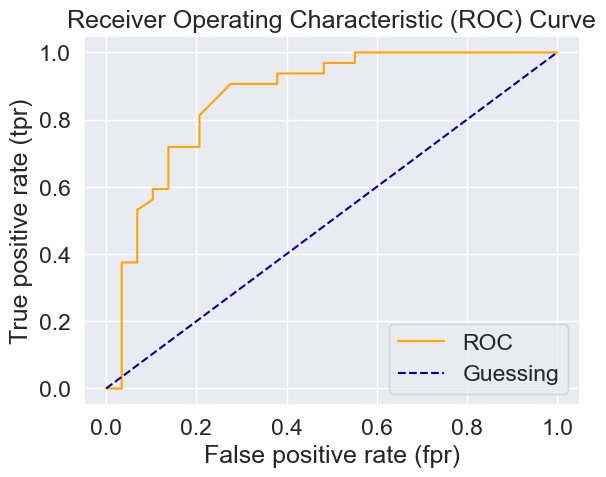

In [74]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')

    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [75]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

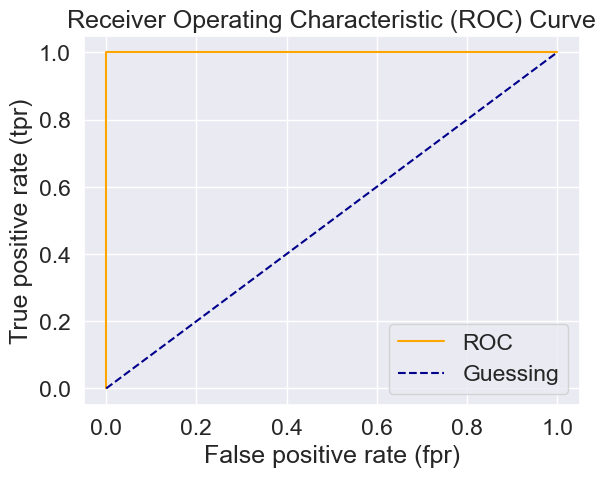

In [76]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [77]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**3. Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [78]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict (X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [79]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Label'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


>Note: We have 23 examples where the predicted and actual labels are 0, 26 examples where they are both 1, and 6 where the predicted and actual labels are different.

In [80]:
(23 + 26 + 6 + 6), len(y_preds), len(X_test)

(61, 61, 61)

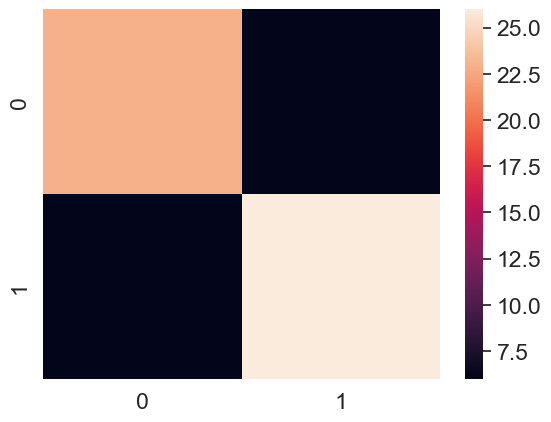

In [81]:
# Visualize confusion matrix with seaborns heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Set the figsize
plt.figure(figsize=(4,3))

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat);

You may get a module not found error.

How to install a conda package into the current environment from a jupyter notebook:
```python
import sys
!conda install --yes --prefix {sys.prefix} seaborn
```

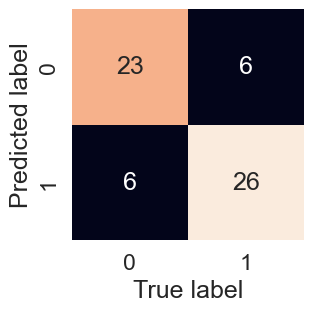

In [82]:
def plot_conf_mat(conf_mat):
    
    """
    Plots confusion matrix using Seaborn's heatmap().
    """

    fig, aX = plt.subplots(figsize=(3,3))
    aX = sns.heatmap(conf_mat,
                    annot=True, # Annotate the boxes with conf_mat info
                    cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label');

    # Fix broken annotation (this happened in matplotlib 3.1.1)
    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5);

plot_conf_mat(conf_mat)         

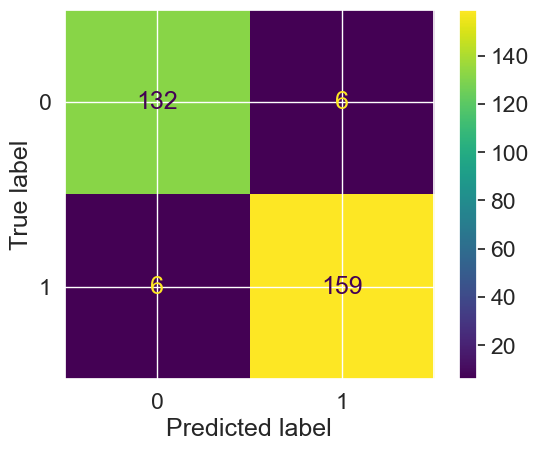

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

# from_estimator does not require predictions
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

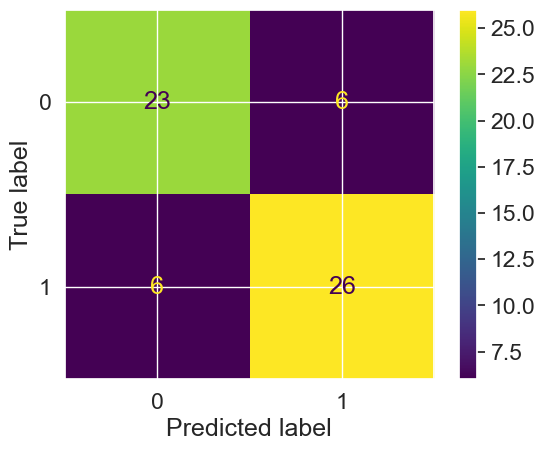

In [86]:
# from_predictions requires predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds)

**4. Classification Report**

<span style="color:green">**Classification report metrics summarize the confusion matrix:**</span>

| |Predicted 0|Predicted 1|
|:--:|:--:|:--:|
|**True 0**|TN|FP|
|**True 1**|FN|TP|

<span style="color:green">**Precision**</span>

Percentage of predicted positive results (target=1) that were correctly classified.

`Precision = TP / (TP + FP)`

<span style="color:green">**Recall / Sensitivity / TPR**</span>

Percentage of actual positive results (target=1) that were correctly classified.

`Recall = TP / (TP + FN)`

<span style="color:green">**F1 score**</span>

Harmonic mean of Precision and Recall.

`F1 = 2 / [(1/Recall) + (1/Precision)] = (2 * Precision * Recall) / (Precision + Recall)`

<span style="color:green">**Support**</span>

Number of samples each metric was calculated on.

`Support (0) = TN + FP`

`Support (1) = FN + TP`

<span style="color:green">**Accuracy**</span>

Percentage of correct predictions overall.

`(TN + TP) / (TN + TP + FN + FP)`

<span style="color:green">**Macro avg**</span>

Arithmetic mean of the individual class (precision, recall, etc.)

<span style="color:green">**Weighted avg**</span>

Average calculated with respect to the number of samples are in each class.

`[(P0 * S0) + (P1 * S1)] / (S0 + S1)`


In [1]:
# From our confusion matrix...
TN = 23
FP = 6
FN = 6
TP = 26

P0 = TN / (TN + FN) # percent of negative predictions that were correctly classified
P1 = TP / (TP + FP) # percent of positive predictions that were correctly classified

R0 = TN / (TN + FP) # percent of actual positive labels that were correctly classified
R1 = TP / (TP + FN) # percent of actual positive labels that were correctly classified

F0 = (2 * P0 * R0) / (P0 + R0) # harmonic mean of P0 and R0
F1 = (2 * P1 * R1) / (P1 + R1) # harmonic mean of P0 and R0

S0 = TN + FP # total number of negative samples
S1 = FN + TP # total number of positive samples

A = (TN + TP) / (TN + TP + FN + FP) # percent of correct predictions overall

mac_avg_P = (P0 + P1) / 2 # average precision
mac_avg_R = (R0 + R1) / 2 # average recall
mac_avg_F = (F0 + F1) / 2 # average f1-score

weighted_avg_P = ((P0 * S0) + (P1 * S1)) / (S0 + S1) # average precision
weighted_avg_R = ((R0 * S0) + (R1 * S1)) / (S0 + S1) # average recall
weighted_avg_F = ((F0 * S0) + (F1 * S1)) / (S0 + S1) # average f1-score

print(f'P0: {P0:.2f}')
print(f'P1: {P1:.2f}')
print('\n')
print(f'R0: {R0:.2f}')
print(f'R1: {R1:.2f}')
print('\n')
print(f'F0: {F0:.2f}')
print(f'F1: {F1:.2f}')
print('\n')
print(f'S0: {S0}')
print(f'S1: {S1}')
print('\n')
print(f'A: {A:.2f}')
print('\n')
print(f'mac_avg_P: {mac_avg_P:.2f}')
print(f'mac_avg_R: {mac_avg_R:.2f}')
print(f'mac_avg_F: {mac_avg_F:.2f}')
print('\n')
print(f'weighted_avg_P: {weighted_avg_P:.2f}')
print(f'weighted_avg_R: {weighted_avg_R:.2f}')
print(f'weighted_avg_F: {weighted_avg_F:.2f}')

P0: 0.79
P1: 0.81


R0: 0.79
R1: 0.81


F0: 0.79
F1: 0.81


S0: 29
S1: 32


A: 0.80


mac_avg_P: 0.80
mac_avg_R: 0.80
mac_avg_F: 0.80


weighted_avg_P: 0.80
weighted_avg_R: 0.80
weighted_avg_F: 0.80


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



<img src='images/classification_report.png' alt='' height='500'>

In [97]:
# When precision and recall become valuable...
# One person, out of 10,000 has a disease. Build a model to predict who has it.
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/Users/ashleycasanova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleycasanova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleycasanova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


Want to use a wide spectrum of evaluation metrics for your classification models and not just accuracy, [check out more here](https://scikit-learn.org/stable/modules/model_evaluation.html).

To sumarize classification metrics:
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same number of samples labeled with 1 or 0)
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

___
#### <span style="color:hotpink">Regression Model Evaluation Metrics</span>

Model evaluation metrics documentation: https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your mode does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [99]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [101]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [102]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [103]:
model.score(X_test, y_test)

0.8066196804802649

In [104]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [105]:
y_test.mean()

2.0550030959302323

In [106]:
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [108]:
r2_score(y_true=y_test, 
         y_pred=y_test_mean) # should be 0

0.0

In [109]:
r2_score(y_test, y_test)

1.0

**Mean Absolute Error (MAE)**

MAE is the average of the absolute differences between the predictions and the actual values. 

It gives you an idea of how wrong your models predictions are.

In [116]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [117]:
df = pd.DataFrame(data={'actual values': y_test,
                        'predicted values':y_preds})

df['differences'] = df['predicted values'] - df['actual values']

df

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.220380,-0.412620
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


In [118]:
abs(df["differences"]).mean()

0.3265721842781009

**Mean squared error (MSE)**

In [119]:
# mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [120]:
# Calculate MSE by hand
squared = np.square(df['differences'])
squared.mean()

0.2534073069137548

In [121]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [122]:
# Let's calculate the MSE by hand
np.mean(df["squared_differences"])

0.2534073069137548

<img src='images/regression-metric.png' alt='' height='500'>

___
#### **Using our `scoring` parameter**

>Note: For more information see the [scoring parameter documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [138]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # default settings --> cv=5, scoring=None
print(cv_acc)
print(f'The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

[0.81967213 0.90163934 0.83606557 0.78333333 0.78333333]
The cross validated accuracy is: 82.48%


In [139]:
# RandomForestClassifier sets scoring to accuracy by default
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy') # change scoring to accuracy
print(cv_acc)
print(f'The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

[0.81967213 0.90163934 0.83606557 0.78333333 0.78333333]
The cross validated accuracy is: 82.48%


In [135]:
# Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
print(cv_precision)
print(f'The cross validated precision is: {np.mean(cv_precision)*100:.2f}%')

[0.80555556 0.90625    0.80645161 0.8        0.73684211]
The cross validated precision is: 81.10%


In [136]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
print(cv_recall)
print(f'The cross validated recall is: {np.mean(cv_recall)*100:.2f}%')

[0.90909091 0.84848485 0.78787879 0.84848485 0.87878788]
The cross validated recall is: 85.45%


In [137]:
# F1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
print(cv_f1)
print(f'The cross validated f1 is: {np.mean(cv_f1)*100:.2f}%')

[0.82352941 0.90625    0.83076923 0.85294118 0.82191781]
The cross validated f1 is: 84.71%


### <span style="color:pink">How about our regression model?</span>

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

model = RandomForestRegressor()

model.score() - returns the coefficient of determination `R2` of the predictiion

In [141]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)

print(cv_r2)
print(f'The cross validated r2 is: {np.mean(cv_r2)*100:.2f}%')

[0.51682354 0.70280719 0.74200859 0.61659773 0.68247339]
The cross validated r2 is: 65.21%


In [142]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

print(cv_r2)
print(f'The cross validated r2 is: {np.mean(cv_r2)*100:.2f}%')

[0.51682354 0.70280719 0.74200859 0.61659773 0.68247339]
The cross validated r2 is: 65.21%


>Note: From the [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) all of the scorer objects follow the convention that **higher return values are better than lower return values**. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.

In [145]:
# Mean Squared Error
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

print(cv_mse)
print(f'The cross validated Mean Squared Error (MSE) is: {np.mean(cv_mse)*100:.2f}%')

[-0.51906307 -0.34788294 -0.37112854 -0.44980156 -0.4626866 ]
The cross validated Mean Squared Error (MSE) is: -43.01%


In [146]:
# Mean absolute error
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

print(cv_mae)
print(f'The cross validated Mean Absolute Error (MAE) is: {np.mean(cv_mae)*100:.2f}%')

[-0.54255936 -0.40903449 -0.43716367 -0.46911343 -0.47319069]
The cross validated Mean Absolute Error (MAE) is: -46.62%


___
### 3. Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to use the `sklearn.metrics` module.

>Note: See documentation [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

**Classification evaluation functions**

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print('Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)*100:.2f}%')
print(f'Recall: {recall_score(y_test, y_preds)*100:.2f}%')
print(f'F1: {f1_score(y_test, y_preds)*100:.2f}%')

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


**Regression evaluation functions** 

In [148]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

# Make some predictions using our regression model
y_preds = model.predict(X_test)

#Evaluate the regression model
print('Regression model metrics on the test set')
print(f'R^2: {r2_score(y_test, y_preds)*100:.2f}%')
print(f'MAE: {mean_absolute_error(y_test, y_preds)*100:.2f}%')
print(f'MSE: {mean_squared_error(y_test, y_preds)*100:.2f}%')


Regression model metrics on the test set
R^2: 80.66%
MAE: 32.66%
MSE: 25.34%


>Note: Cross validation evaluates models using multiple train-test-splits making it a better indication of how your model will perform.